In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
# Read in a dataset directly from the package
g = nx.karate_club_graph()

# Data Management

When working with particularly large graphs, dictionaries can be a light weight and memory efficient way to work with data.

In [9]:
nx.to_dict_of_lists(g)

{0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31],
 1: [0, 2, 3, 7, 13, 17, 19, 21, 30],
 2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32],
 3: [0, 1, 2, 7, 12, 13],
 4: [0, 6, 10],
 5: [0, 6, 10, 16],
 6: [0, 4, 5, 16],
 7: [0, 1, 2, 3],
 8: [0, 2, 30, 32, 33],
 9: [2, 33],
 10: [0, 4, 5],
 11: [0],
 12: [0, 3],
 13: [0, 1, 2, 3, 33],
 14: [32, 33],
 15: [32, 33],
 16: [5, 6],
 17: [0, 1],
 18: [32, 33],
 19: [0, 1, 33],
 20: [32, 33],
 21: [0, 1],
 22: [32, 33],
 23: [25, 27, 29, 32, 33],
 24: [25, 27, 31],
 25: [23, 24, 31],
 26: [29, 33],
 27: [2, 23, 24, 33],
 28: [2, 31, 33],
 29: [23, 26, 32, 33],
 30: [1, 8, 32, 33],
 31: [0, 24, 25, 28, 32, 33],
 32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33],
 33: [8, 9, 13, 14, 15, 18, 19, 20, 23, 26, 27, 28, 29, 30, 31, 32, 22]}

In [10]:
nx.to_dict_of_dicts(g)

{0: {1: {'weight': 4},
  2: {'weight': 5},
  3: {'weight': 3},
  4: {'weight': 3},
  5: {'weight': 3},
  6: {'weight': 3},
  7: {'weight': 2},
  8: {'weight': 2},
  10: {'weight': 2},
  11: {'weight': 3},
  12: {'weight': 1},
  13: {'weight': 3},
  17: {'weight': 2},
  19: {'weight': 2},
  21: {'weight': 2},
  31: {'weight': 2}},
 1: {0: {'weight': 4},
  2: {'weight': 6},
  3: {'weight': 3},
  7: {'weight': 4},
  13: {'weight': 5},
  17: {'weight': 1},
  19: {'weight': 2},
  21: {'weight': 2},
  30: {'weight': 2}},
 2: {0: {'weight': 5},
  1: {'weight': 6},
  3: {'weight': 3},
  7: {'weight': 4},
  8: {'weight': 5},
  9: {'weight': 1},
  13: {'weight': 3},
  27: {'weight': 2},
  28: {'weight': 2},
  32: {'weight': 2}},
 3: {0: {'weight': 3},
  1: {'weight': 3},
  2: {'weight': 3},
  7: {'weight': 3},
  12: {'weight': 3},
  13: {'weight': 3}},
 4: {0: {'weight': 3}, 6: {'weight': 2}, 10: {'weight': 3}},
 5: {0: {'weight': 3}, 6: {'weight': 5}, 10: {'weight': 3}, 16: {'weight': 3}},
 6: 

### Adjacency Matrix

In [55]:
# convert graph to an adjacency matrix
adj = nx.to_pandas_adjacency(g)
# write to csv
adj.to_csv('karate_adj.csv', index = False)

# read it back in
adj = pd.read_csv('karate_adj.csv')

# this will fail to convert to a graph object if we don't change column because the index and columns are of a different data type
# can use a list comprehension or something else to align data types
#adj.columns = [int(col) for col in adj.columns]
adj.columns = adj.columns.astype(int)

# convert to graph object
g = nx.from_pandas_adjacency(adj)

### Edge list

In [63]:
# convert graph to an edgelist
el = nx.to_pandas_edgelist(g)
# wite to csv
el.to_csv('karate_el.csv', index = False)
el = pd.read_csv('karate_el.csv')

g = nx.from_pandas_edgelist(el)

### Graph Objects

In [67]:
# hit tab after the graph object to bring up the various functions and instances of the object.
g.

# Plotting

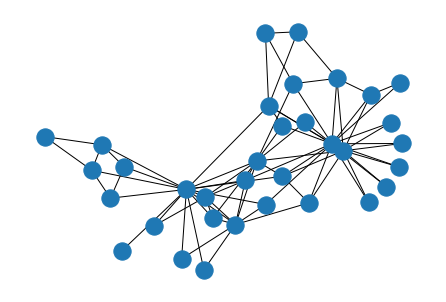

In [81]:
# drawing will use some algorithm with a random seed to determine node position.
# to change the layout, the draw method accepts a pos argument
nx.draw(g)

In [89]:
# different algorithms can be used for plotting. You can also adjust the parameters of the algorithm
spring = nx.spring_layout(g)
spectral = nx.spectral_layout(g)
kamada = nx.kamada_kawai_layout(g)

pos = nx.spring_layout(g, seed = 1)

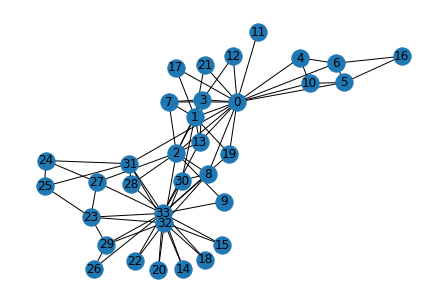

In [107]:
# here we can use K to adjust the optimal distance between nodes
nx.draw(g, pos = nx.spring_layout(g, k = 0.2), with_labels = True)

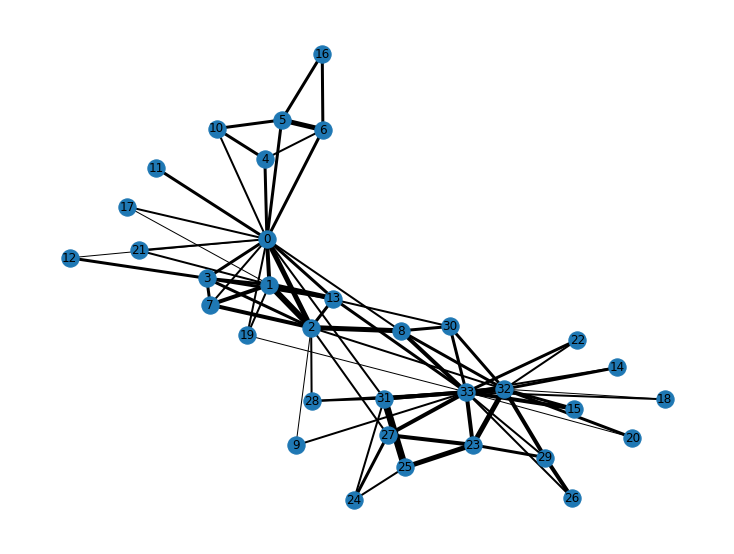

In [236]:
# add weights to the graph edges
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()])

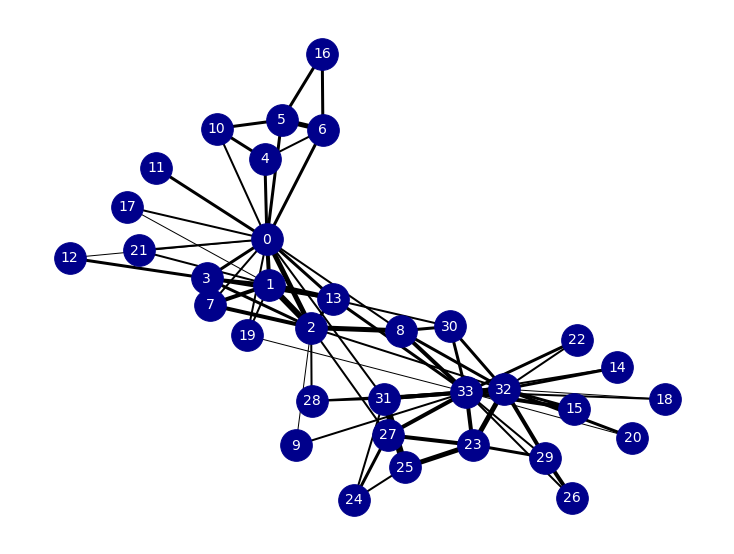

In [232]:
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = 1000, 
        font_size = 14, 
        font_color = 'white',
        node_color='darkblue')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()

# Centrality

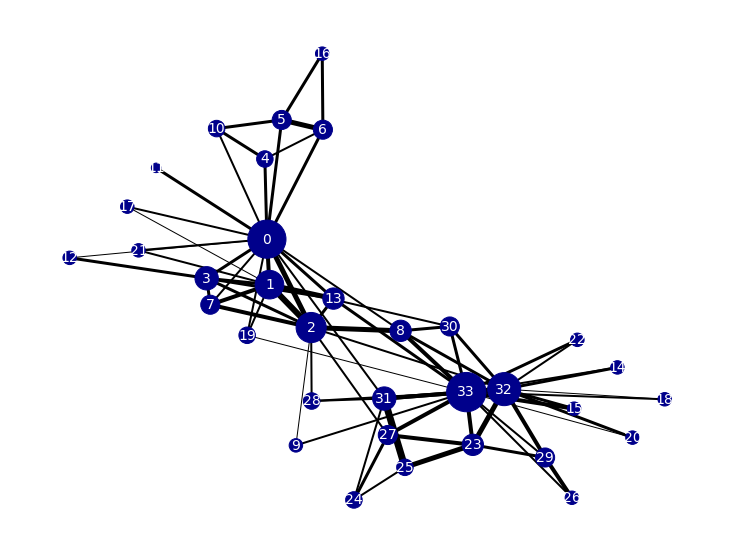

In [233]:
# Degree centrality is the fraction of all nodes that a node is connected to
centrality = nx.degree_centrality(g).values()

# We could adjust node size based on this.
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = [v * 3000 for v in centrality], 
        font_size = 14, 
        font_color = 'white',
        node_color='darkblue')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()


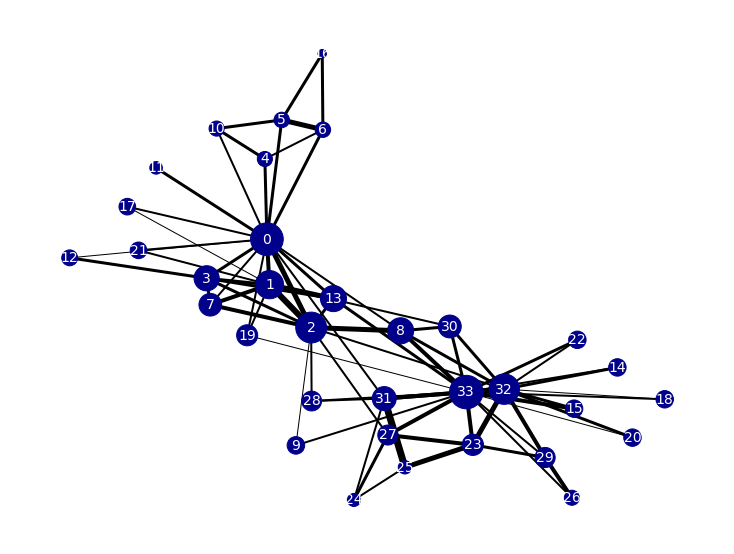

In [234]:
# Eigenvector centrality is a measure of centrality based on the importance of neighbors.
centrality = nx.eigenvector_centrality(g).values()

# We could adjust node size based on this.
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = [v * 3000 for v in centrality], 
        font_size = 14, 
        font_color = 'white',
        node_color='darkblue')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()

# Transitivity

In [171]:
# we can compute transitivity for the entire graph, which is the fraction of all possible triangles present.
nx.transitivity(g)

0.2556818181818182

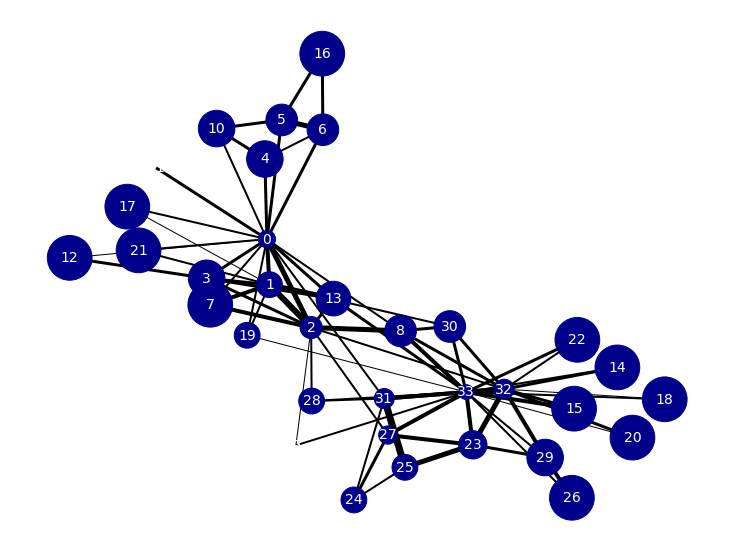

In [237]:
# the clustering coefficient is the proportion of all triangles that exist out of all possible triangles.
clustercoef = nx.clustering(g).values()

# We could adjust node size based on this.
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = [v * 2000 for v in clustercoef], 
        font_size = 14, 
        font_color = 'white',
        node_color='darkblue')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()


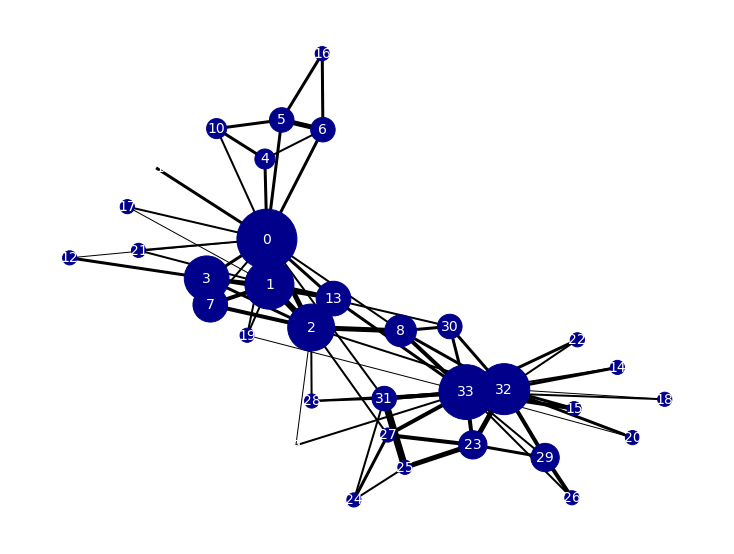

In [238]:
# A better measurement might be the number of triangles that a node is a part of.
triangles = nx.triangles(g).values()

# We could adjust node size based on this.
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = [v * 200 for v in triangles], 
        font_size = 14, 
        font_color = 'white',
        node_color='darkblue')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()



# Communities

Information flow was particularly important to identifying where the karate club split. Lets create a plot that shows where the splot occurred to see if you method of measuring transitivity seems appropriate.

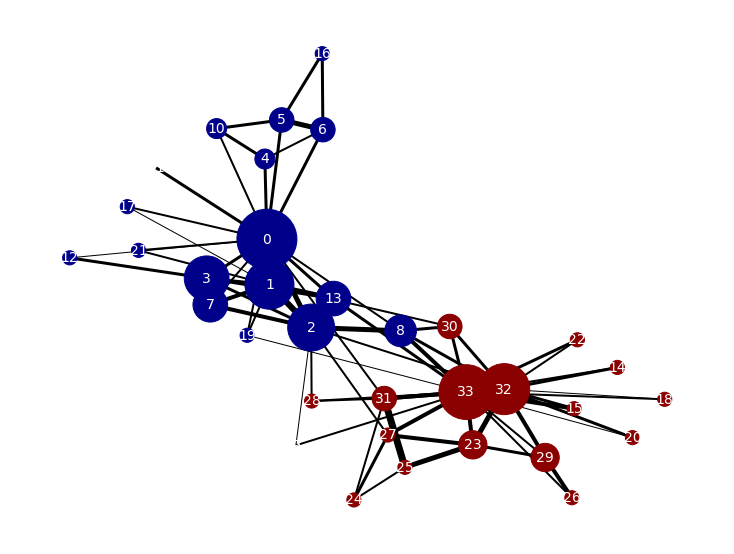

In [244]:
# Nodes in this network have an attribute called club that indicates which community they belong to.
# You can color nodes by community.
node_colors = ['darkblue' if g.nodes[n]['club'] == 'Mr. Hi' else 'darkred' for n in g.nodes]

# Measure transitvity with traingles
triangles = nx.triangles(g).values()

# We could adjust node size based on this.
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = [v * 200 for v in triangles], 
        font_size = 14, 
        font_color = 'white',
        node_color=node_colors)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()


Let's try a community detection algorithm to see if it can recapture the structure.

In [241]:
# Identify the two groups in the network using Girvan-Newman algorithm
comp = nx.algorithms.community.girvan_newman(g)

# Extract the two groups from the decomposition
groups = []
for c in next(comp):
    groups.append(list(c))

# create a dictionary for assigning node attributes
group_dict = {}
for i, group in enumerate(groups):
    for node in group:
        group_dict[node] = i

# assign the node attributes
nx.set_node_attributes(g, group_dict, 'group')

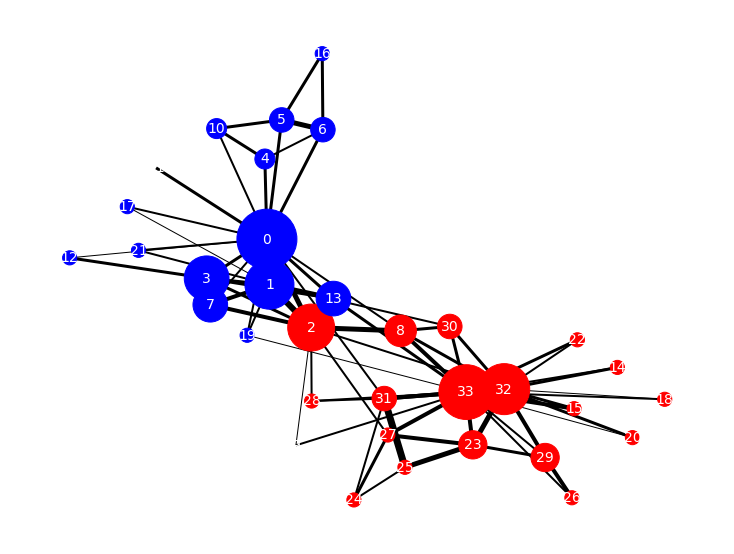

In [243]:
node_colors = ['blue' if g.nodes[n]['group'] == 0 else 'red' for n in g.nodes]

# Measure transitvity with traingles
triangles = nx.triangles(g).values()

# Plot
nx.draw(g, pos = pos, with_labels = True, width = [u[2]['weight'] for u in g.edges.data()], 
        node_size = [v * 200 for v in triangles], 
        font_size = 14, 
        font_color = 'white',
        node_color=node_colors)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

# Show the plot
plt.show()
